### Ames Housing Dataset Exploratory Data Analysis

In [1]:
# This is an attempt at Ames Housing dataset 
# We want to create a predictor of price! So target variable = SalePrice
# We have 81 Features : find out the important features 
# Dashboarding for Ridge and Lasso Regression 

In [2]:
# Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Plotly 
import plotly.offline as pyo
import plotly.graph_objs as go

In [4]:
 # Import the dataset
df = pd.read_csv('housing.csv')

In [5]:
# Quick look at the data
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1089,1090,120,FV,37.0,3316,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,197000
1042,1043,120,RL,34.0,5381,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,196000
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,105000
1103,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,159500
1124,1125,80,RL,NaN,9125,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,163900


In [6]:
# There are many features : likely will have to evaluate feature importance and selection
df.shape

(1460, 81)

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Exploratory Data Analysis : Nulls 

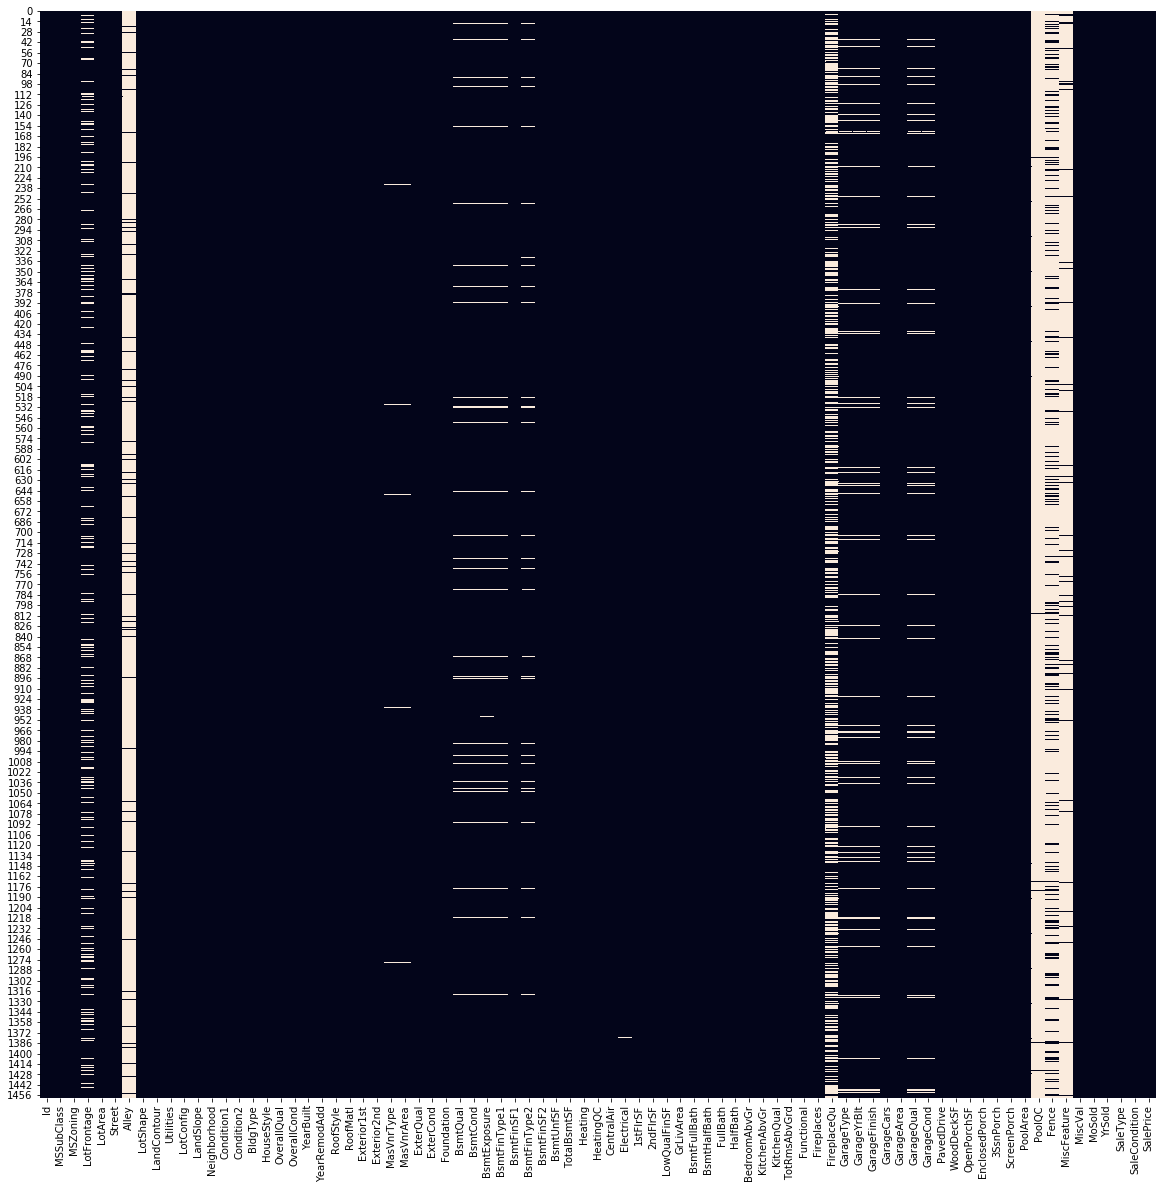

In [8]:
# Use heatmap to visualise density of the Null values
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), cbar = None)
plt.show()

In [9]:
# Prelim data cleaning
# Look for null values > 40% of the rows

many_nulls =[]

for v,i in enumerate(df.isnull().sum()):
    if i > 0.5*len(df):
        print(df.columns[v],i)
        many_nulls.append(df.columns[v])

Alley 1369
PoolQC 1453
Fence 1179
MiscFeature 1406


In [10]:
many_nulls

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

C:\Users\Zach\Anaconda3\envs\ztdl-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



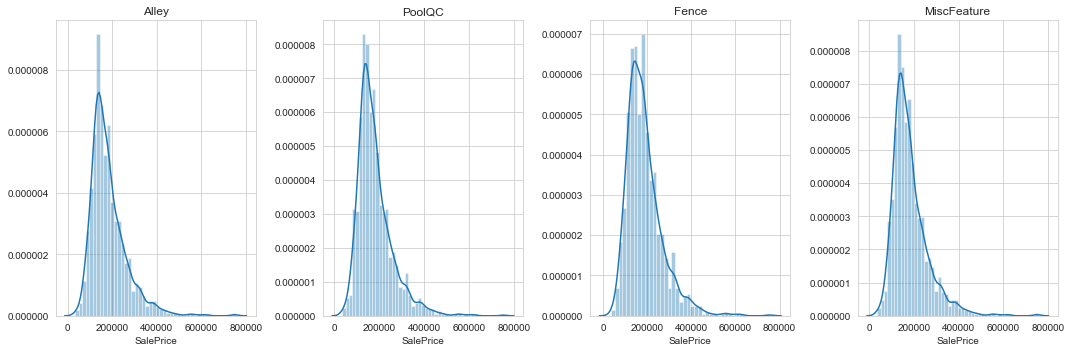

In [11]:
# investigate the distribution of features with > 40% nulls

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
 
for i,col in enumerate(many_nulls):
    plt.subplot(1,len(many_nulls),i+1)
    sns.distplot(df[df[col].isnull()]['SalePrice'])
    plt.title(col)
    plt.xlabel('SalePrice')
plt.tight_layout()

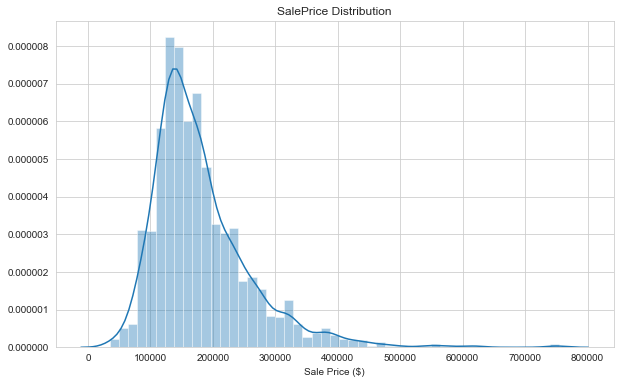

In [12]:
# It will seem that the distribution the nulls are similar to that of overall SalesPrice
# Can assume that nulls are random and not that helpful for understanding what drives SalePrice
plt.figure(figsize=(10,6))
sns.distplot(df['SalePrice'])
plt.title('SalePrice Distribution')
plt.xlabel('Sale Price ($)')
plt.show()

In [13]:
# Looks like we can proceed to drop columns! 
# are outliers afecting the visualisation ?

## Outliers

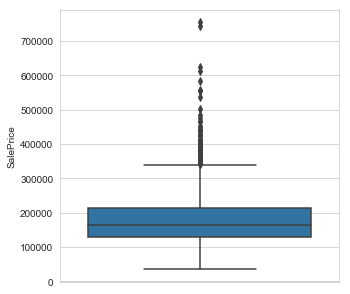

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(df['SalePrice'], orient='v')
plt.show()

In [15]:
# What are the max and min values
print('Max SalePrice is {}'.format(df['SalePrice'].max()))
print('Min SalePrice is {}'.format(df['SalePrice'].min()))

Max SalePrice is 755000
Min SalePrice is 34900


In [16]:
# Housing is very much tied in to squarefootage
# What are the metrics related to Living Area?
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Identify Numeric vs Categorical Features

In [17]:
# We can sort the numeric and categoric 
for col in df.columns:
    print(col, df[col].nunique(),df[col].dtypes)

Id 1460 int64
MSSubClass 15 int64
MSZoning 5 object
LotFrontage 110 float64
LotArea 1073 int64
Street 2 object
Alley 2 object
LotShape 4 object
LandContour 4 object
Utilities 2 object
LotConfig 5 object
LandSlope 3 object
Neighborhood 25 object
Condition1 9 object
Condition2 8 object
BldgType 5 object
HouseStyle 8 object
OverallQual 10 int64
OverallCond 9 int64
YearBuilt 112 int64
YearRemodAdd 61 int64
RoofStyle 6 object
RoofMatl 8 object
Exterior1st 15 object
Exterior2nd 16 object
MasVnrType 4 object
MasVnrArea 327 float64
ExterQual 4 object
ExterCond 5 object
Foundation 6 object
BsmtQual 4 object
BsmtCond 4 object
BsmtExposure 4 object
BsmtFinType1 6 object
BsmtFinSF1 637 int64
BsmtFinType2 6 object
BsmtFinSF2 144 int64
BsmtUnfSF 780 int64
TotalBsmtSF 721 int64
Heating 6 object
HeatingQC 5 object
CentralAir 2 object
Electrical 5 object
1stFlrSF 753 int64
2ndFlrSF 417 int64
LowQualFinSF 24 int64
GrLivArea 861 int64
BsmtFullBath 4 int64
BsmtHalfBath 3 int64
FullBath 4 int64
HalfBath 3 

In [18]:
# We can first filter based on dtypes

def get_feature_groups():
    
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    
    # Numerical Features
    num_f= df.select_dtypes(include=['int64','float64']).columns
    num_f = num_f.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_f = df.select_dtypes(include=['object']).columns
    return list(num_f), list(cat_f)

num_f, cat_f = get_feature_groups()

In [19]:
# some of the 'numerical' features are actually categorical
df[num_f].columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [20]:
# look to convert certain features that should be categorical , but are int/float
df['MSSubClass'] = df.MSSubClass.apply(lambda x: str(x))
df['MoSold'] = df.MoSold.apply(lambda x: str(x))
df['YrSold'] = df.YrSold.apply(lambda x: str(x))

num_f, cat_f = get_feature_groups()

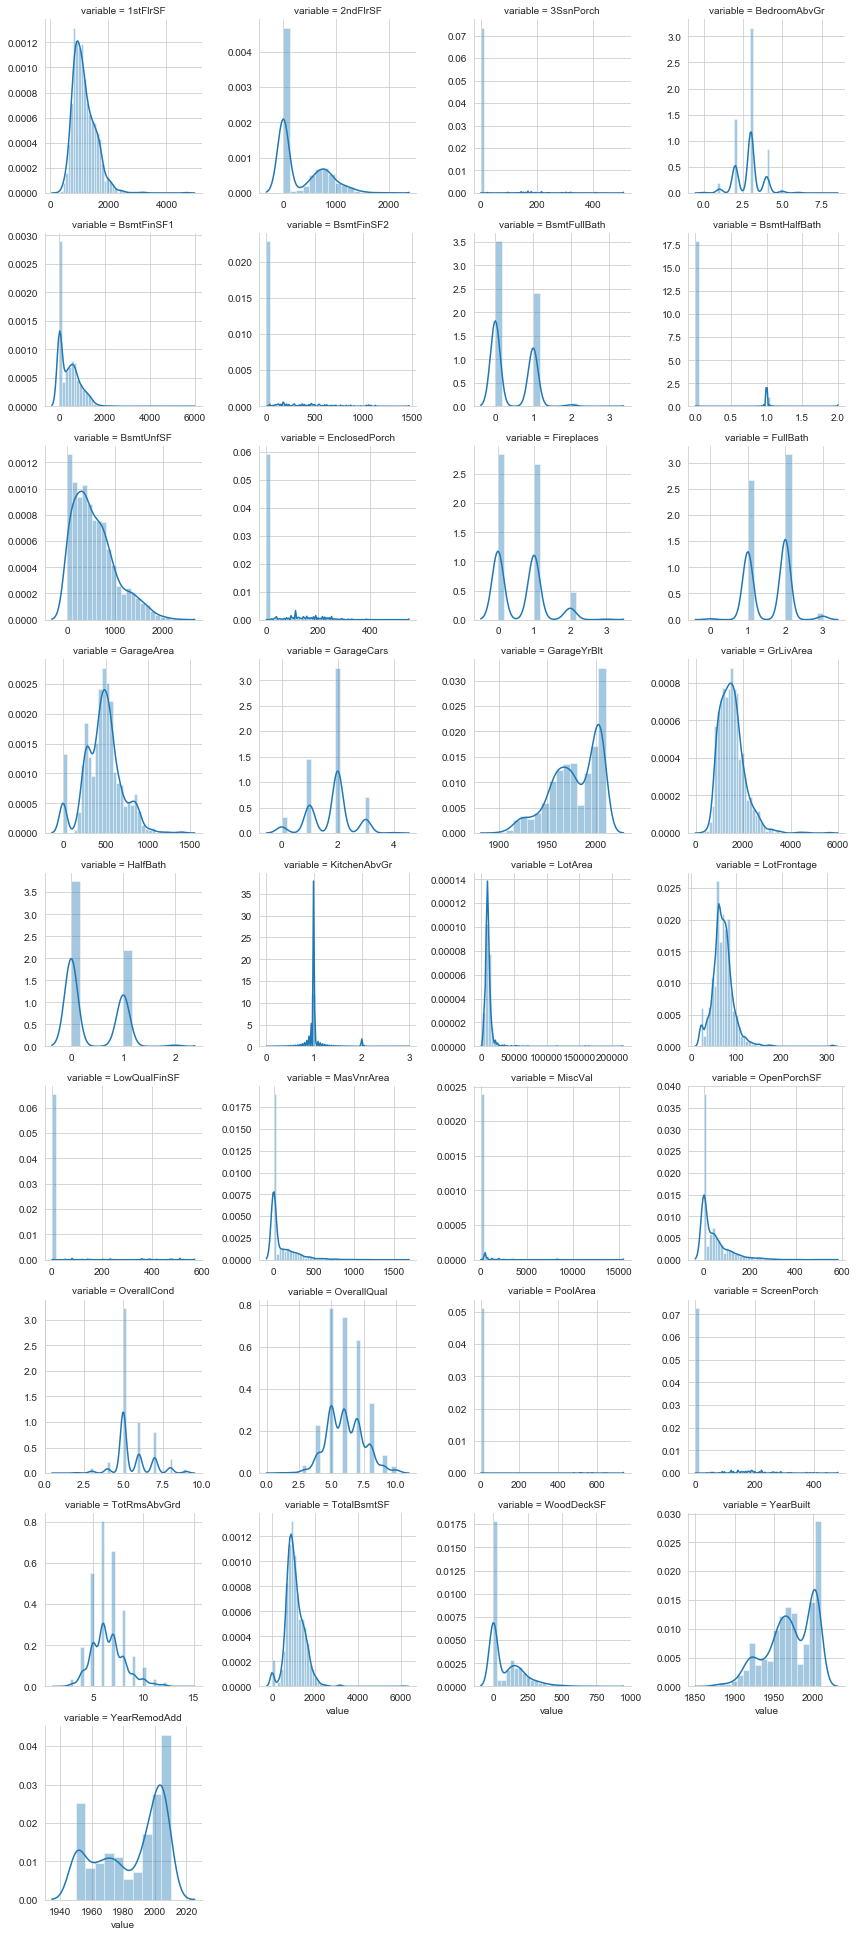

In [21]:
# Distribution of the numerical features
f = pd.melt(df,value_vars=sorted(num_f))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')
plt.show()

C:\Users\Zach\Anaconda3\envs\ztdl-gpu\lib\site-packages\seaborn\axisgrid.py:715: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



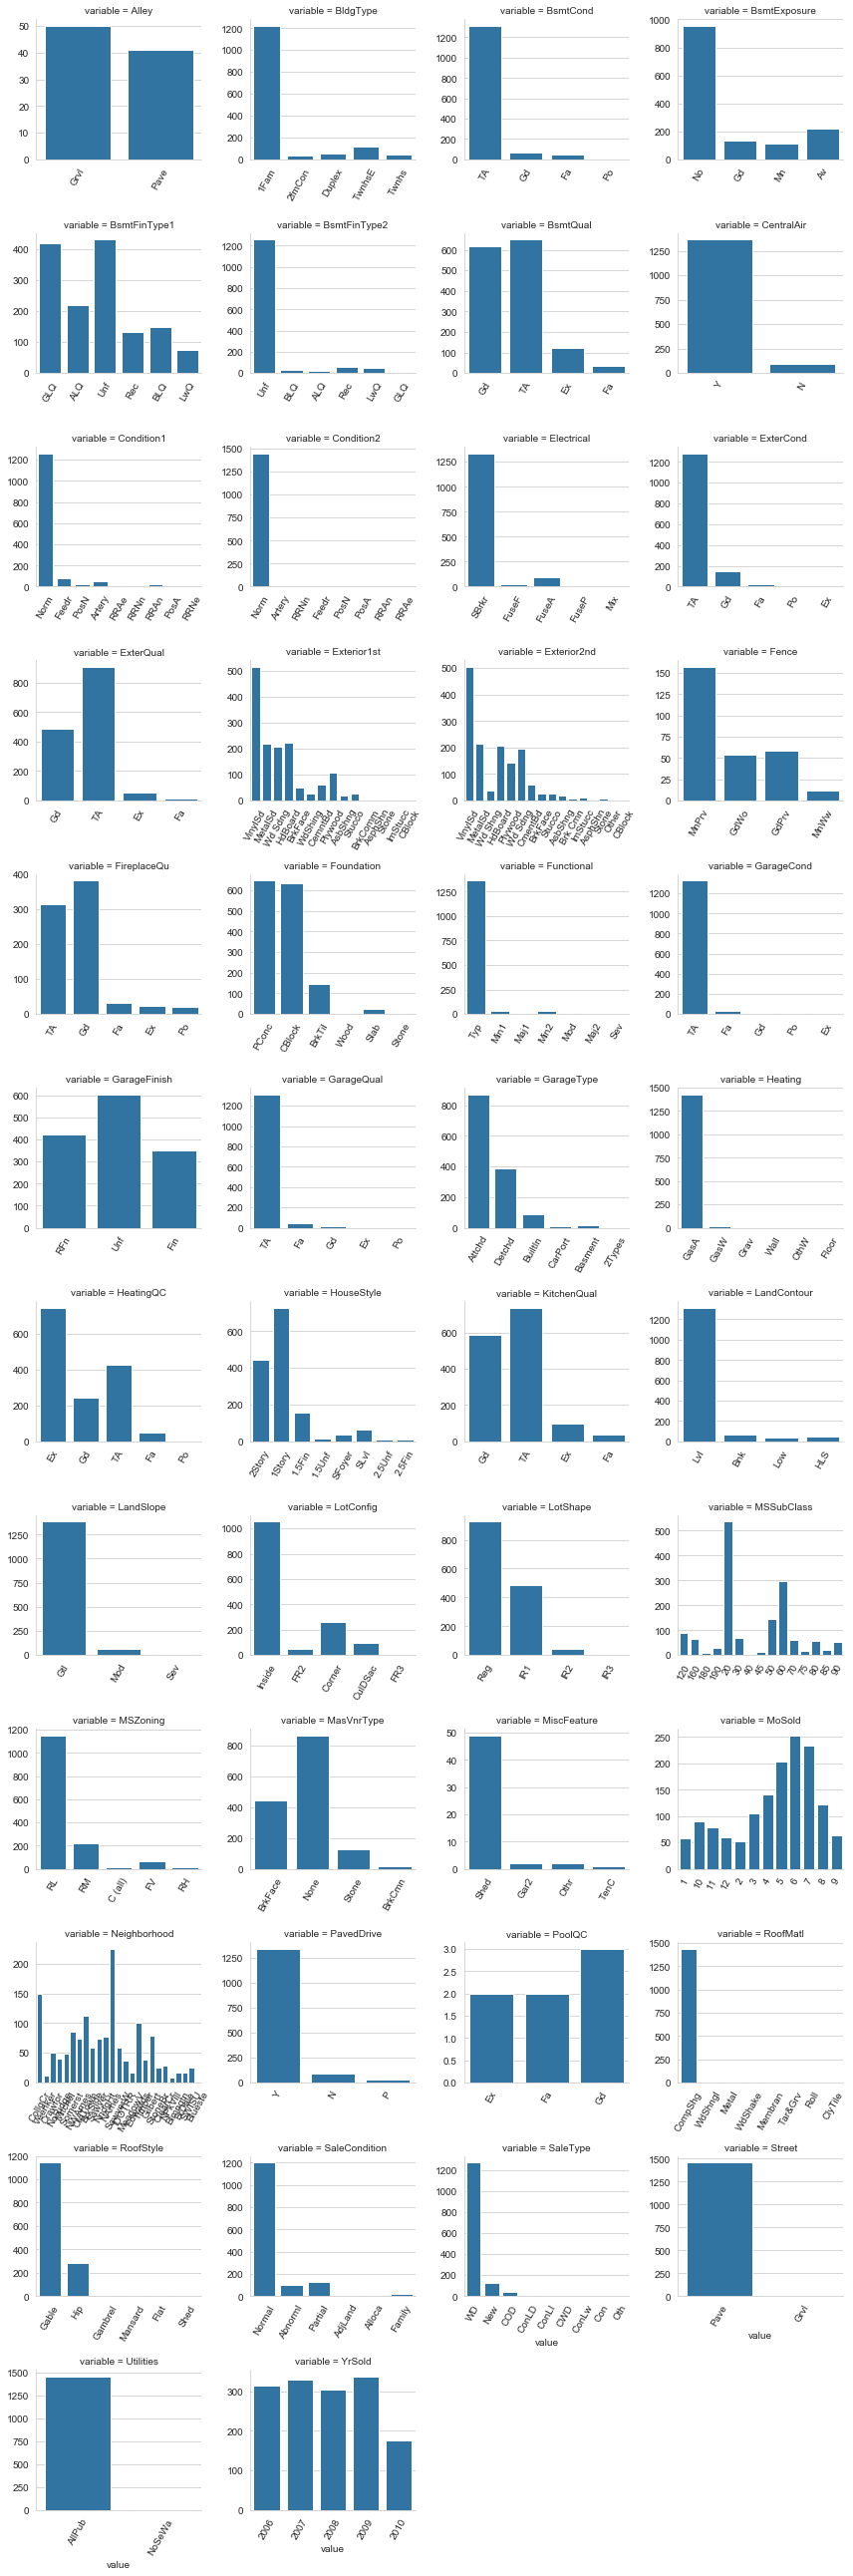

In [22]:
# Distribution of the categrical features 

f = pd.melt(df,value_vars=sorted(cat_f))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [ ]:
# heatmap
# Let's take a look at the correlation between numerical features

corr = df[['SalePrice'] + num_f].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap,mask=mask)

plt.show()

#data =[go.]

 ### Additional features for the data set

In [ ]:
# Total Square Footage
df['TotalSF'] = df.TotalBsmtSF + df.GrLivArea
df['TotalFloorSF'] = df['1stFlrSF'] + df['2ndFlrSF'] # this is 
df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + \
    df['3SsnPorch'] + df.ScreenPorch

In [ ]:
# Total Bathrooms
df['TotalBathrooms'] = df.FullBath + .5 * df.HalfBath + \
    df.BsmtFullBath + .5 * df.BsmtHalfBath

In [ ]:
# Booleans
df['HasBasement'] = df.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
df['HasGarage'] = df.GarageArea.apply(lambda x: 1 if x > 0 else 0)
df['HasPorch'] = df.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
df['HasPool'] = df.PoolArea.apply(lambda x: 1 if x > 0 else 0)
df['WasRemodeled'] = (df.YearRemodAdd != df.YearBuilt).astype(np.int64)
df['IsNew'] = (df.YearBuilt > 2000).astype(np.int64)

boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 
                    'WasRemodeled', 'IsNew']

In [ ]:
num_f, cat_f = get_feature_groups()
num_f = [f for f in num_f if f not in boolean_features]

In [ ]:
# Scatter plots of numerical features against SalePrice
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(num_f))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

## Fixed Features Ridge Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
# GridSearch here to find the optimal alpha value
param_grid = {'alpha': [0.01, 0.1, 1., 5., 10., 25., 50., 100.]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid)
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']

# Using optimum : Alpha 
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid)
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']
ridge = ridge.best_estimator_


print('Ridge -> R^2: {:.5f} | alpha: {:.5f}'.format(cross_val_score(ridge, X_test, y_test, cv=5, scoring='r2').mean(), alpha))